<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/8_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [3]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [4]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


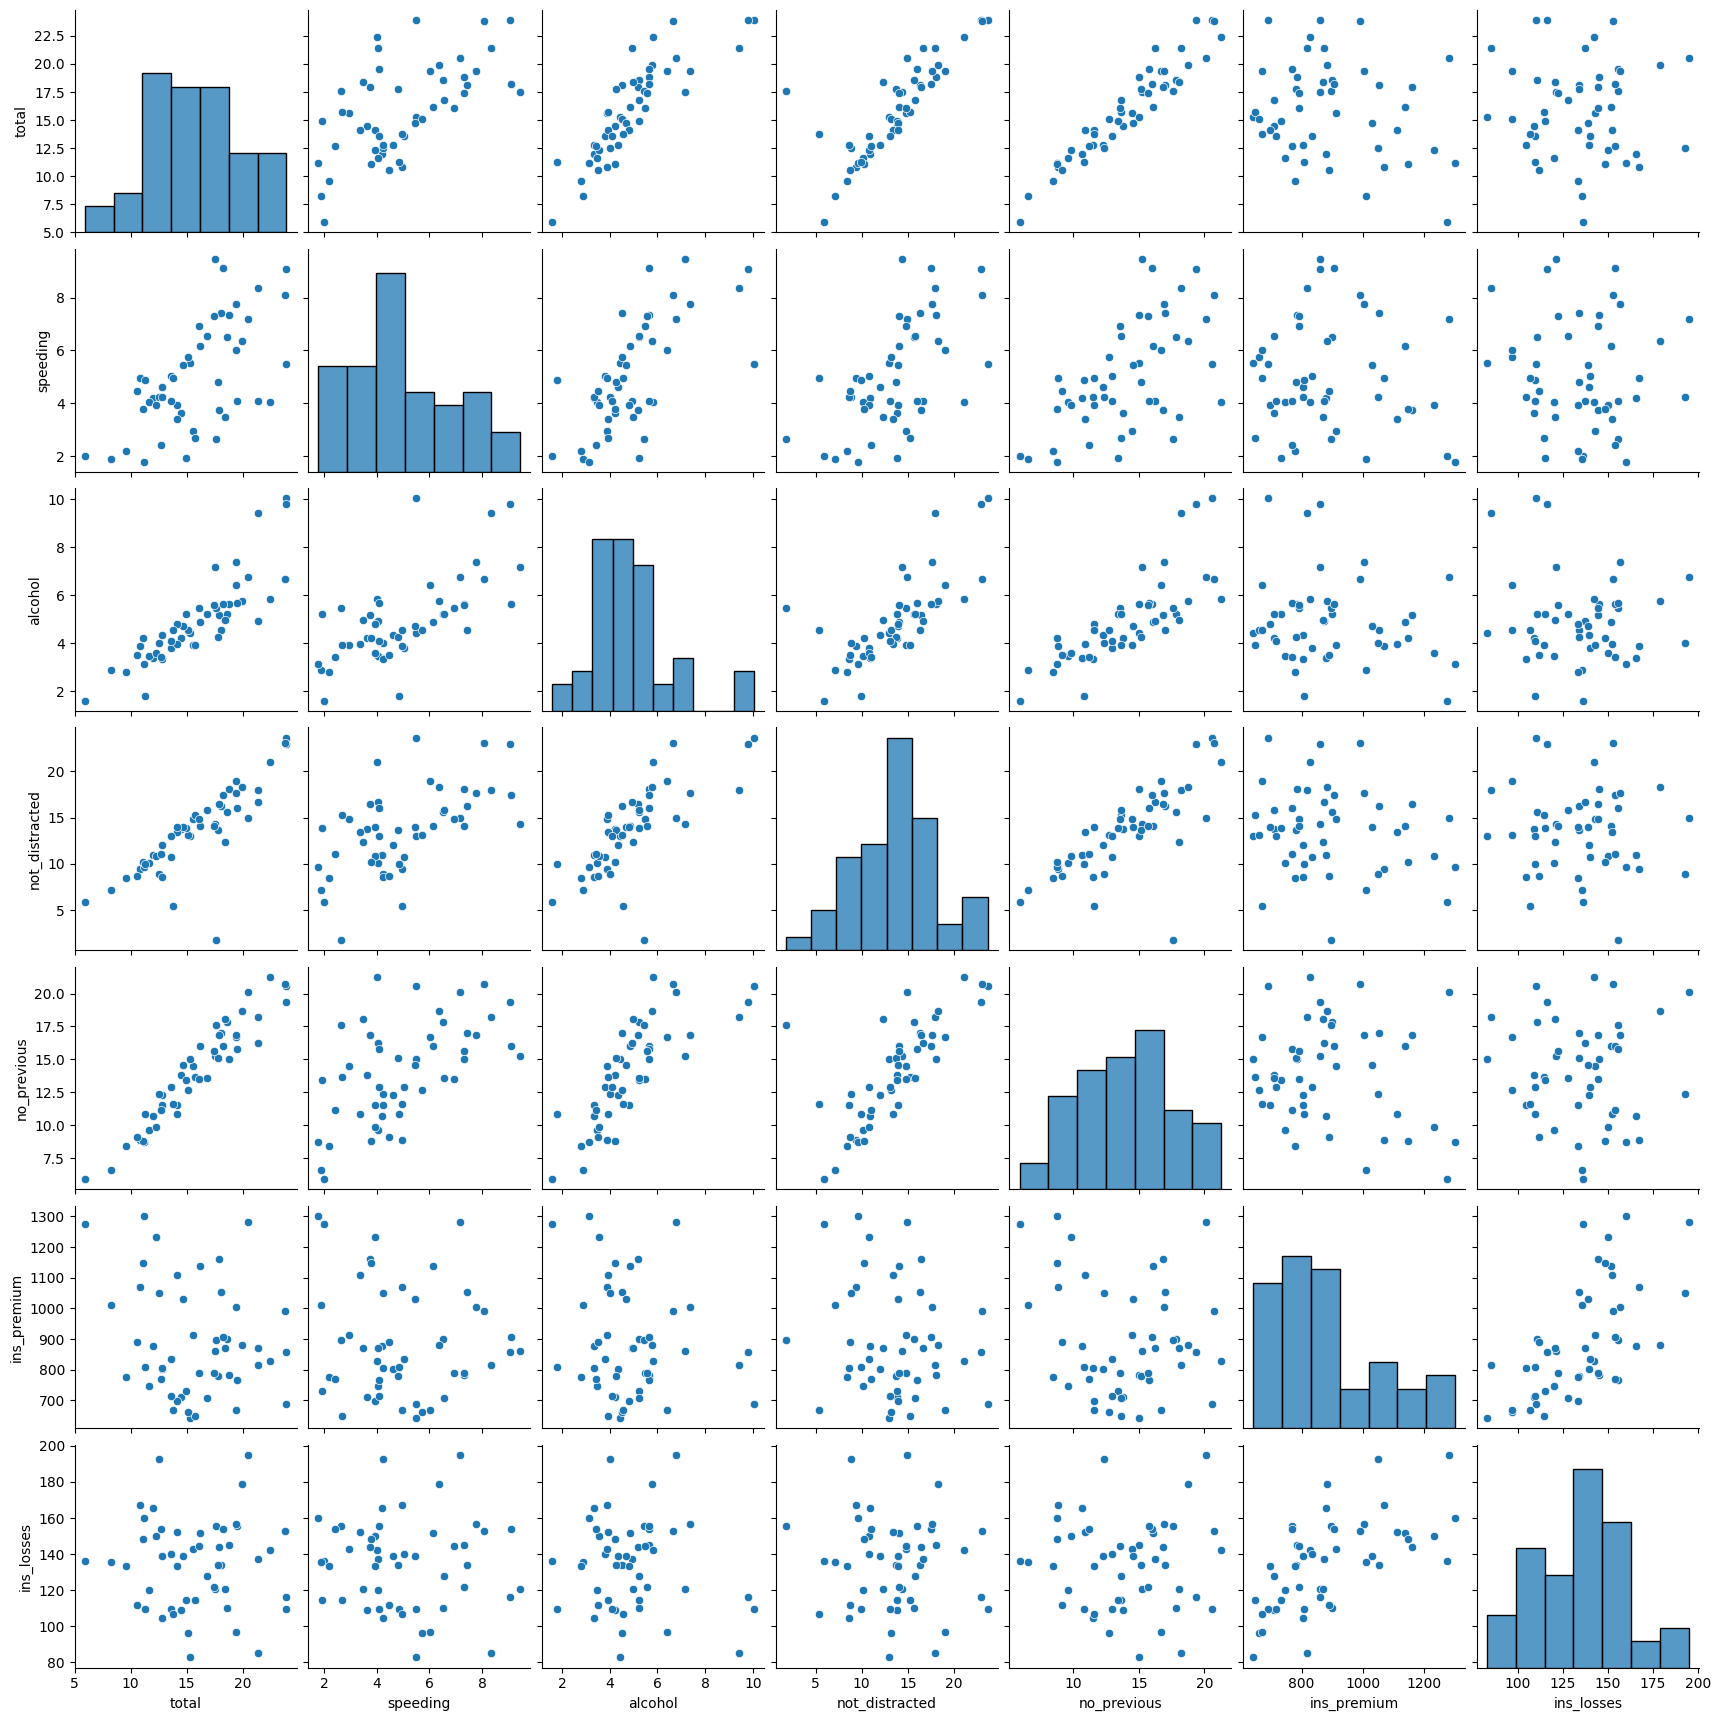

In [5]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [6]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['speeding']]
Var_Dep= df['total']

In [7]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c   ("Función cuadrática")

            y = a*exp(-bx) + c   ("Función exponencial")

            y = 1/a*x           ("Función inversa")

            y = a*np.sin(x) + b ("Función senoidal")

            y = a*np.tan(x) + b ("Función tangencial")

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

            y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

            y = a*np.log(x) + b  (Función logaritmica)

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

            y = 1/a*x**2  (Función cuadrática inversa)

            y = a/b*x**2 + c*x (Función polinomial inversa)





**MODELO 1**

In [8]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [9]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['speeding'], df['total'])

In [10]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-0.03880463,  1.66956532,  8.56968483])

In [11]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [12]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,speeding
0,18.724870
1,18.822510
2,17.794011
3,14.670524
4,14.897345
5,15.988365
6,15.906347
7,17.376976
8,11.762682
9,14.297268


C:\Users\vbece\AppData\Local\Temp\ipykernel_19068\4154269995.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\vbece\AppData\Local\Temp\ipykernel_19068\4154269995.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "red")


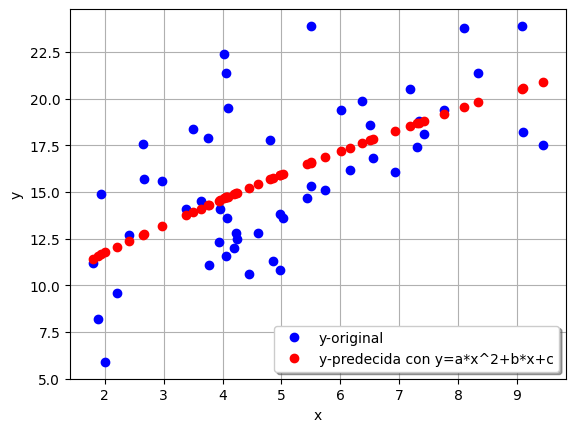

In [13]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [14]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.3757626403582762

In [15]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.6129948126683261)

**MODELO 2**

In [16]:
def func2(x, a, b, c):
    return (a*x**2 + b)/ c*x**2

In [17]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['speeding'], df['total'])

In [18]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([ -10.01909867, 1098.8978937 , 1320.94798879])

In [19]:
# Predicciones
y_pred2 = func2(x, *parametros2)

In [20]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,speeding
0,22.801911
1,22.810385
2,21.633230
3,11.519646
4,12.314580
5,16.201571
6,15.911877
7,20.633252
8,3.224780
9,10.240457


C:\Users\vbece\AppData\Local\Temp\ipykernel_19068\3806274907.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\vbece\AppData\Local\Temp\ipykernel_19068\3806274907.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "red")


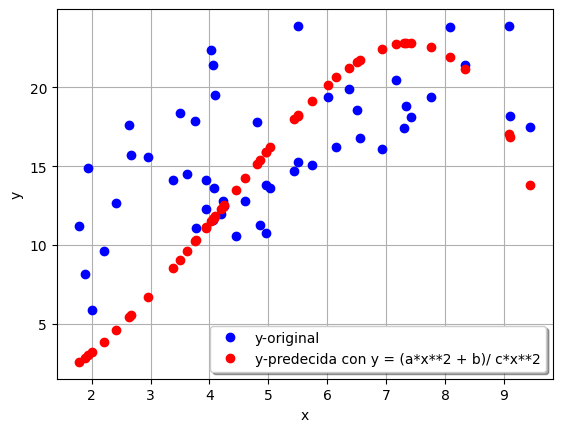

In [21]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [22]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2

-0.8271386431817409

In [23]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo2))
R

np.float64(0.9094716285743832)